use only few selected features. maximum change in energy level are taken from anode to eml and cathode to eml.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [7]:
# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='max_step')
print(df.shape)
df.head()

(185, 13)


,no,max_delta,total_htl,triplet1,LUMO,HOMO,triplet2,thick,triplet3,thick_etl,delta_max,cd/A,label
0,1,0.60,90.0,3.00,1.09,5.34,2.91,25,3.36,35,1.82,28.24,30
1,2,4.80,50.0,2.87,2.02,5.56,2.84,20,2.75,45,0.98,40.80,50
2,3,0.60,80.0,2.87,2.40,5.90,3.00,20,2.75,45,0.60,26.30,30
3,4,0.51,40.0,0.00,2.70,5.71,NaN,50,0.00,0,1.00,3.38,10
4,5,0.60,55.0,2.60,2.02,5.35,2.60,30,2.60,30,1.00,1.00,10


In [8]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
# NAs[NAs.sum(axis=1) > 0]

triplet2     18
triplet3      1
label         0
cd/A          0
delta_max     0
thick_etl     0
thick         0
HOMO          0
LUMO          0
triplet1      0
total_htl     0
max_delta     0
no            0
dtype: int64

In [9]:
#fill the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(166, 13)


In [10]:
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(166, 12)


,max_delta,total_htl,triplet1,LUMO,HOMO,triplet2,thick,triplet3,thick_etl,delta_max,cd/A,label
0,0.6,90.0,3.00,1.09,5.34,2.91,25,3.36,35,1.82,28.24,30
1,4.8,50.0,2.87,2.02,5.56,2.84,20,2.75,45,0.98,40.80,50
2,0.6,80.0,2.87,2.40,5.90,3.00,20,2.75,45,0.60,26.30,30
4,0.6,55.0,2.60,2.02,5.35,2.60,30,2.60,30,1.00,1.00,10
5,0.7,81.0,3.00,2.70,5.60,2.80,20,2.99,35,0.77,7.30,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBE2F09BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BBE11475F8>]], dtype=object)

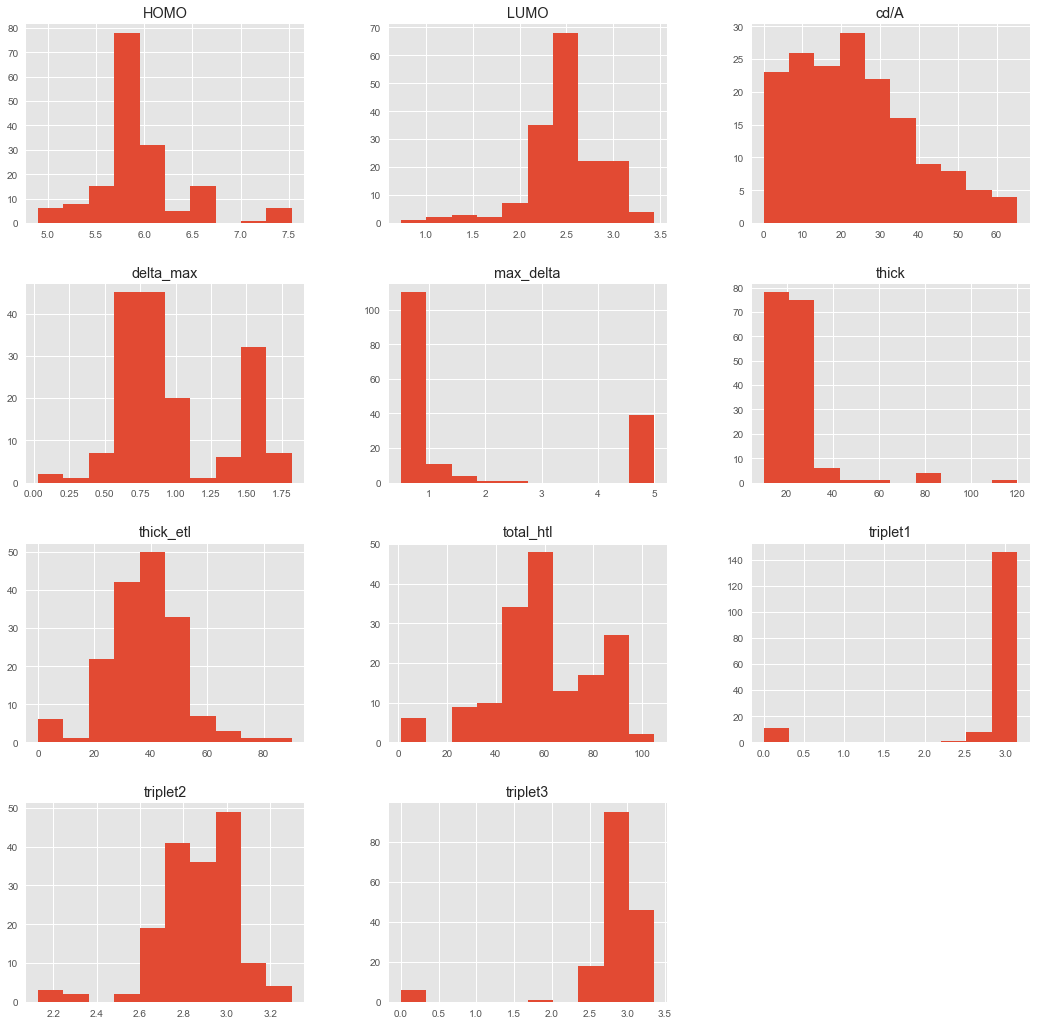

In [14]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)
graph = df[list(df.columns)[:-1]]
graph.hist()

In [26]:
df.dtypes

max_delta    float64
total_htl    float64
triplet1     float64
LUMO         float64
HOMO         float64
triplet2     float64
thick          int64
triplet3     float64
thick_etl      int64
delta_max    float64
cd/A         float64
label         object
dtype: object

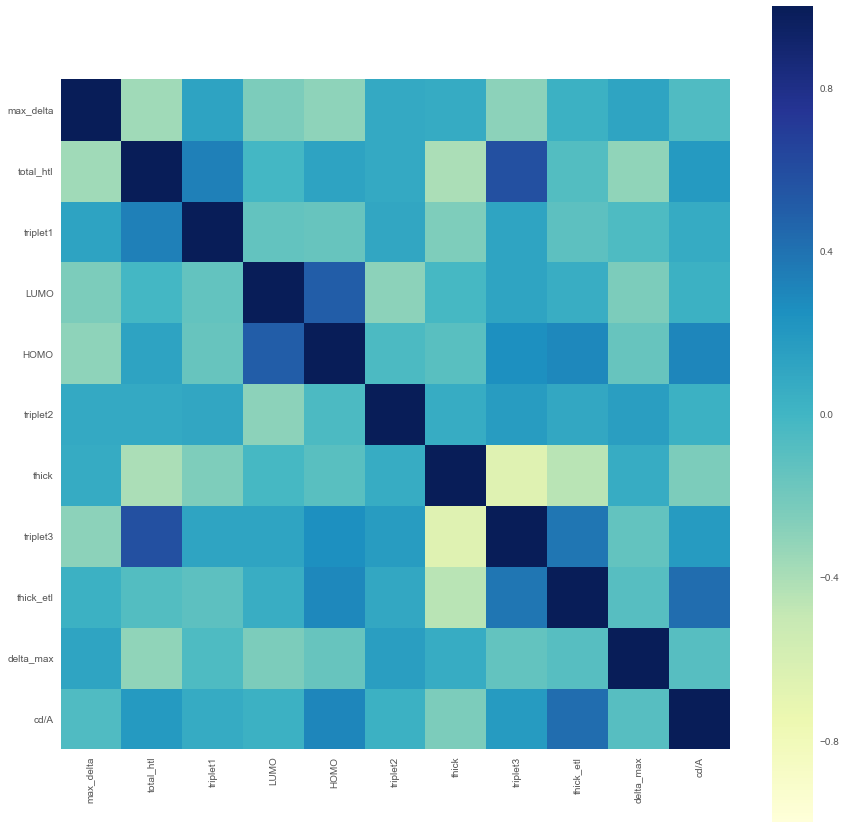

List the features in descending order of their correlation with cd/A:

thick_etl:   0.4223699551691336
HOMO:   0.3030189502918254
thick:   -0.2368792029815969
total_htl:   0.1908619131381109
triplet3:   0.18661983138419724
delta_max:   -0.08750029405337811
triplet1:   0.0715204856259516
max_delta:   -0.058675513408390695
LUMO:   0.038364733025263074
triplet2:   0.03802369181360048


In [16]:
X = df[list(df.columns)[:-1]]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

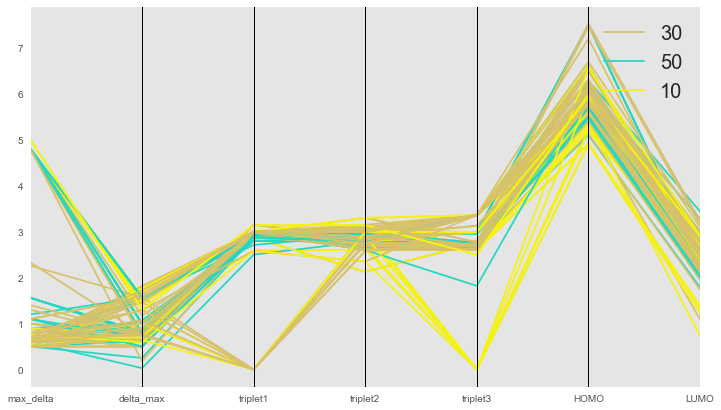

In [17]:
# parallel coordinate
X = df[['max_delta'] + ['delta_max']+ ['triplet1']+ ['triplet2']+ ['triplet3'] + ['HOMO'] + ['LUMO'] + ['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20, 'legend.loc':'best'}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.show()

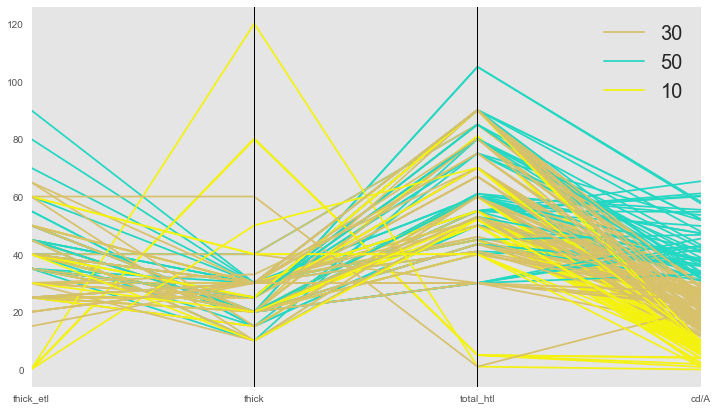

In [18]:
# parallel coordinate
X = df[['thick_etl'] + ['thick']+ ['total_htl'] + ['cd/A'] +['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.show()

In [19]:
X = df[list(df.columns)[:-2]]
y = df[['cd/A']]
print(X.shape)
X.head()

(166, 10)


,max_delta,total_htl,triplet1,LUMO,HOMO,triplet2,thick,triplet3,thick_etl,delta_max
0,0.6,90.0,3.00,1.09,5.34,2.91,25,3.36,35,1.82
1,4.8,50.0,2.87,2.02,5.56,2.84,20,2.75,45,0.98
2,0.6,80.0,2.87,2.40,5.90,3.00,20,2.75,45,0.60
4,0.6,55.0,2.60,2.02,5.35,2.60,30,2.60,30,1.00
5,0.7,81.0,3.00,2.70,5.60,2.80,20,2.99,35,0.77


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  -0.286464472028


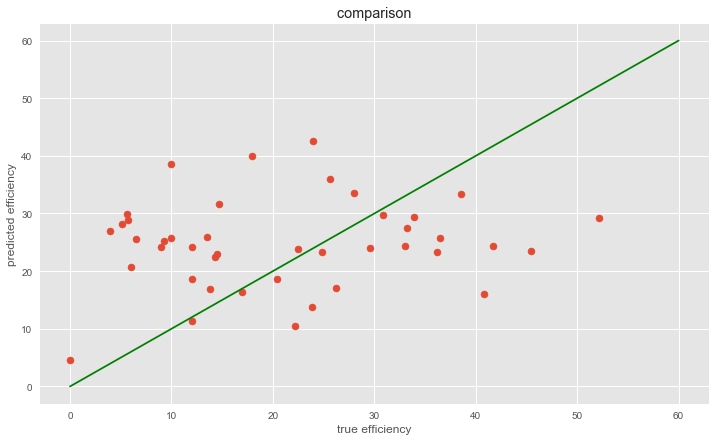

In [21]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [22]:
# see the prediction on training set
y_predictions = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

0.326202887313


In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.0231068123464


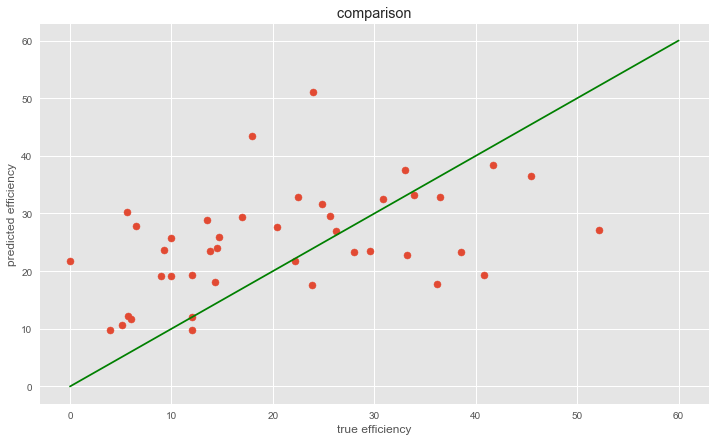

In [24]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [25]:
# see the prediction on training set
y_predictions = regressor.predict(X_train)
print(regressor.score(X_train, y_train))

0.902794728446


In [26]:
from sklearn.neural_network import MLPRegressor
# choose regression algorithms
regressor = MLPRegressor(random_state=12, hidden_layer_sizes=100, activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train, y_train.values.ravel())

# print r squared, scores and coefficient
y_predictions = regressor.predict(X_test)
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  -0.533336262212


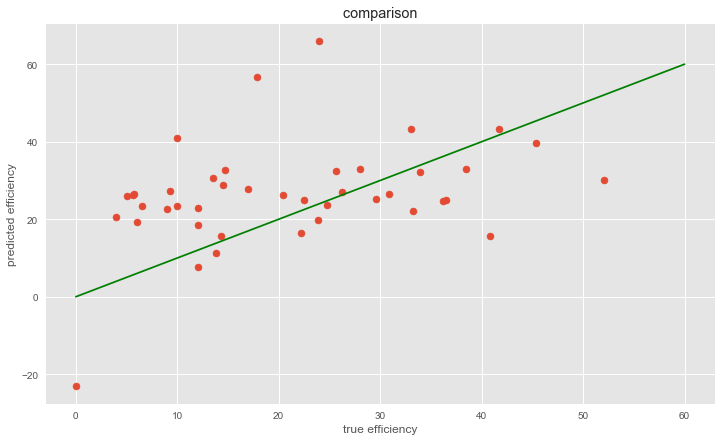

In [27]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()